# 다양한 분석 가능한 예제 테스트 해보기

## Case #. 패키지에 포함된 데이터 집합을 사용하는 예제
### 인터넷 연결이 필요없는 경우

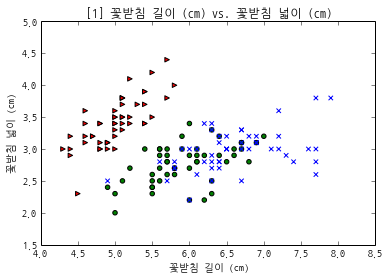

In [8]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
%matplotlib inline

from matplotlib import pyplot as plt
from pylab import *
import numpy as np

# sklearn의 load_iris로 데이터를 로드한다.
from sklearn.datasets import load_iris
data = load_iris()
# load_iris는 몇 개의 필드를 객체를 반환한다.
features = data.data
features_names = data.feature_names
target = data.target
target_names = data.target_names
# 0:1, 0:2, 0:3
# 1:0, 1:2, 1:3
# 2 .. 3 총 12가지 가짓수 출력이 가능함


def eng_to_kor(eng):
    kor = eng.replace("sepal", unicode("꽃받침", "utf-8"))
    kor = kor.replace("petal", unicode("꽃잎", "utf-8"))
    kor = kor.replace("length", unicode("길이", "utf-8"))
    kor = kor.replace("width", unicode("넓이", "utf-8"))
    return kor

i = 0
for x in range(4):
    for y in range(4):
        if x == y: continue
        # print "[{0}]\t".format(i), x, y
        i += 1
        # continue
        for t in range(3):
            if t == 0:
                c = 'r'
                marker = '>'
            elif t == 1:
                c = 'g'
                marker = 'o'
            elif t == 2:
                c = 'b'
                marker = 'x'
            fx = features[target == t, x]
            fy = features[target == t, y]
            plt.scatter(fx, fy, marker=marker, c=c)
        plt.rc('font', family='NanumGothicCoding')
        _xlabel = eng_to_kor(features_names[x])
        _ylabel = eng_to_kor(features_names[y])
        _title = "[{0}] ".format(i) + _xlabel + " vs. " + _ylabel
        plt.title(_title)
        plt.xlabel(_xlabel)
        plt.ylabel(_ylabel)
        plt.show()
        break
    break


## Case #. 로컬 파일을 사용하는 예제
### 로컬에 다운로드 된 데이터를 직접 액세스 하는 경우

In [11]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
%matplotlib inline

import scipy as sp
data = sp.genfromtxt("/Users/psyoblade/workspace/jupyter/ch01/data/web_traffic.tsv", delimiter="\t")
print(data[:10])
print(data.shape)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00   1.65600000e+03]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


## Case #. 인터넷 Web 페이지를 사용하는 예제
### HTTP GET 방식을 활용하는 경우

In [13]:
import requests
response = requests.get('http://hiscore.runescape.com/index_lite.ws?player=zezima')
print (response.status_code)
print (response.content[0:10])

200
58,2715,52


### HTML Scraping 방식을 활용하는 경우

In [15]:
from lxml import html
import requests
# http://docs.python-guide.org/en/latest/scenarios/scrape/
page = requests.get('http://econpy.pythonanywhere.com/ex/001.html')
tree = html.fromstring(page.content)
#This will create a list of buyers:
buyers = tree.xpath('//div[@title="buyer-name"]/text()')
#This will create a list of prices
prices = tree.xpath('//span[@class="item-price"]/text()')
print 'Buyers: ', buyers
print 'Prices: ', prices

Buyers:  ['Carson Busses', 'Earl E. Byrd', 'Patty Cakes', 'Derri Anne Connecticut', 'Moe Dess', 'Leda Doggslife', 'Dan Druff', 'Al Fresco', 'Ido Hoe', 'Howie Kisses', 'Len Lease', 'Phil Meup', 'Ira Pent', 'Ben D. Rules', 'Ave Sectomy', 'Gary Shattire', 'Bobbi Soks', 'Sheila Takya', 'Rose Tattoo', 'Moe Tell']
Prices:  ['$29.95', '$8.37', '$15.26', '$19.25', '$19.25', '$13.99', '$31.57', '$8.49', '$14.47', '$15.86', '$11.11', '$15.98', '$16.27', '$7.50', '$50.85', '$14.26', '$5.68', '$15.00', '$114.07', '$10.09']


### HTML BeautifulSoap 활용하는 경우

<class 'bs4.BeautifulSoup'>
<!DOCTYPE html>
<html class="no-js" lang="en-US" xml:lang="en-US" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#">
 <head>
  <title>
   Legislative Alerts
  </title>
  <meta content="text/html; charset=utf-8" name="Content-Type"/>
  <meta content="en-US" name="Content-language"/>
  <meta content="" name="author"/>
  <meta content="" name="copyright"/>
  <meta content="" name="description"/>
  <meta content="" name="keywords"/>
  <meta content="TRUE" name="MSSmartTagsPreventParsing"/>
  <meta content="eZ Publish" name="generator"/>
  <meta content="Legislative Alerts" property="og:title"/>
  <meta content="http://www.aflcio.org/Legislation-and-Politics/Legislative-Alerts" property="og:url"/>
  <meta content="AFL-CIO" property="og:site_name"/>
  <meta content="http://www.aflcio.org/extension/aflcio/design/aflcio_user/images/facebook_aflcio_200x200.jpg" property="og:image"/>
  <meta content="non_profit" property="og:type"/>
  <meta content=

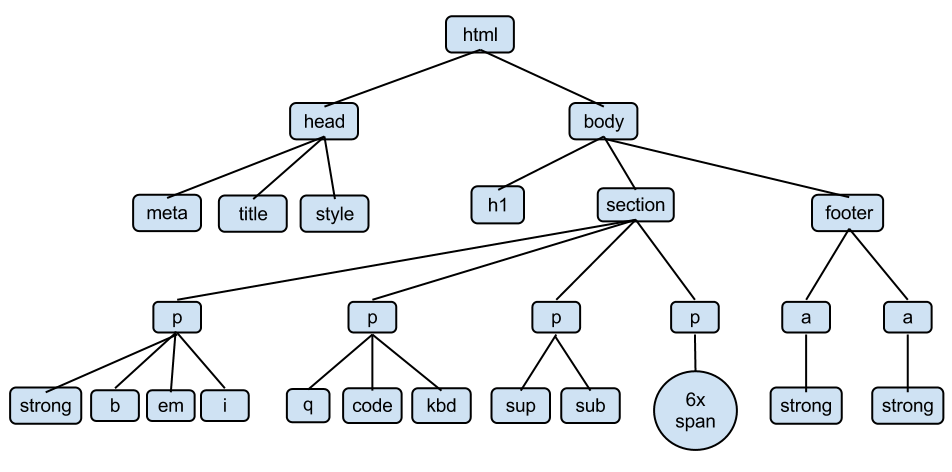

In [26]:
# http://web.stanford.edu/~zlotnick/TextAsData/Web_Scraping_with_Beautiful_Soup.html
from bs4 import BeautifulSoup
import urllib
r = urllib.urlopen('http://www.aflcio.org/Legislation-and-Politics/Legislative-Alerts').read()
soup = BeautifulSoup(r)
print type(soup)
print soup.prettify()[0:1000]
from IPython.display import Image
Image('http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png')

## Case #. 인터넷 Open API를 사용하는 예제
### HTTP API 연결이 필요한 경우

In [17]:
# https://www.dataquest.io/blog/python-api-tutorial/

# Set up the parameters we want to pass to the API.
# This is the latitude and longitude of New York City.
parameters = {"lat": 40.71, "lon": -74}

# Make a get request with the parameters.
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

# Print the content of the response (the data the server returned)
print(response.content)

{
  "message": "success", 
  "request": {
    "altitude": 100, 
    "datetime": 1465400116, 
    "latitude": 40.71, 
    "longitude": -74.0, 
    "passes": 5
  }, 
  "response": [
    {
      "duration": 222, 
      "risetime": 1465412133
    }, 
    {
      "duration": 620, 
      "risetime": 1465417670
    }, 
    {
      "duration": 622, 
      "risetime": 1465423457
    }, 
    {
      "duration": 552, 
      "risetime": 1465429326
    }, 
    {
      "duration": 570, 
      "risetime": 1465435167
    }
  ]
}


## Case #. SDK 패키지 컬렉션을 사용하는 예제
### NLTK 패키지의 Stopword 데이터를 사용하는 경우

In [4]:
import sklearn.datasets
# 아래와 같이 관련 패키지에 데이터 URL이 하드코딩 되어 있어서 방화벽을 이용한 아키텍처에서만 가능함.
# /Library/Python/2.7/site-packages/sklearn/datasets/twenty_newsgroups.py
# URL = ("http://people.csail.mit.edu/jrennie/"
#        "20Newsgroups/20news-bydate.tar.gz")
# ARCHIVE_NAME = "20news-bydate.tar.gz"
# CACHE_NAME = "20news-bydate.pkz"
# TRAIN_FOLDER = "20news-bydate-train"
# TEST_FOLDER = "20news-bydate-test"
# http://people.csail.mit.edu/jrennie/20Newsgroups/20news-bydate.tar.gz
all_data = sklearn.datasets.fetch_20newsgroups(subset='all')
print(len(all_data.filenames))

# 대안으로써 관련 패키지를 직접 다운로드 후, 사용하도록 가이드라인을 제공하거나, 유명한 코퍼스는 사전에 적재하는 방안이 있겠다.

18846


## Case #. 클러스터 파일을 사용하는 예제
### HDFS 연결이 필요한 경우

## Case #. Amazon 파일을 사용하는 예제
### Amazon S3에 저장된 파일 접근이 필요한 경우

## Case #. PySpark 통하여 클러스터 분석 예제
### HDFS에 저장된 파일을 이용하여 pyspark 데이터 분석